## Deep Autoencoder

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random 

from tensorflow.keras.models import Model

from tensorflow.keras.utils import plot_model

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
from tensorflow import keras
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


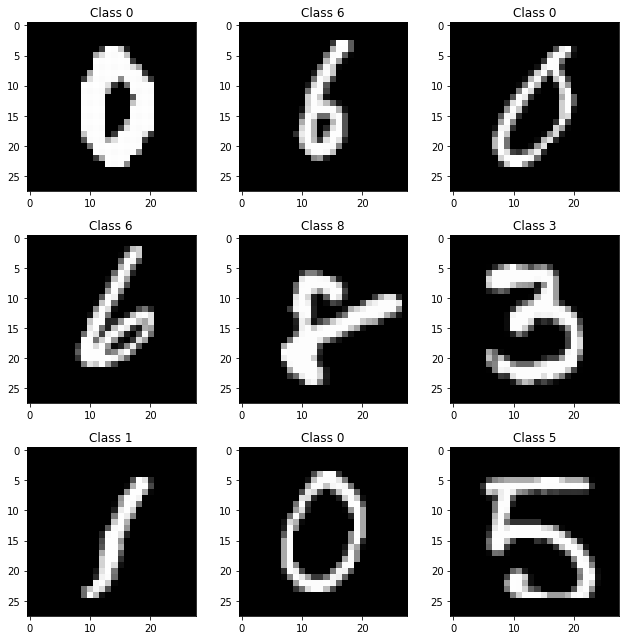

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [5]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(x_train[num])

0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  
0  0  0  0  0   1   76  135  154  170  175  174  174  174  199  255  254  254  209  174  175  174  120    2   0  0  0  0  
0  0  0  0  0  51  253  253  253  253  254  253  253  253  253  254  253  253  253  253  254  253  247   52   0  0  0  0  
0  0  0  0  0  23  206  174  237  253  236  145  127   82   47   97   57   62   47   47   48   47   39    0   0  0  0  0  
0  0  0  0  0   

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [17]:
#crear modelo encoder
input_img = tf.keras.Input(shape=(784,))
encoded = tf.keras.layers.Dense(128, activation='relu')(input_img)
encoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(2, activation='relu')(encoded)

#crear modelo decoder
decoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(128, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 2)                 130       
                                                                 
 dense_9 (Dense)             (None, 64)                192       
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               1011

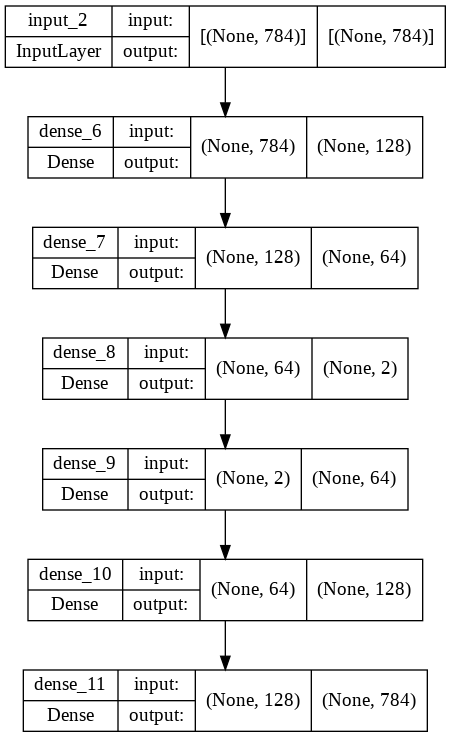

In [18]:
#crear modelo completo autoncoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()
plot_model(autoencoder, to_file='deepAutoencoder.png', show_shapes=True)

In [19]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [20]:
autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/200
235/235 [==============================] - 2s 7ms/step - loss: 0.2789 - val_loss: 0.2309
Epoch 2/200
235/235 [==============================] - 1s 6ms/step - loss: 0.2253 - val_loss: 0.2184
Epoch 3/200
235/235 [==============================] - 1s 6ms/step - loss: 0.2150 - val_loss: 0.2105
Epoch 4/200
235/235 [==============================] - 1s 6ms/step - loss: 0.2079 - val_loss: 0.2044
Epoch 5/200
235/235 [==============================] - 1s 6ms/step - loss: 0.2013 - val_loss: 0.1983
Epoch 6/200
235/235 [==============================] - 1s 6ms/step - loss: 0.1963 - val_loss: 0.1945
Epoch 7/200
235/235 [==============================] - 1s 6ms/step - loss: 0.1933 - val_loss: 0.1923
Epoch 8/200
235/235 [==============================] - 1s 6ms/step - loss: 0.1911 - val_loss: 0.1904
Epoch 9/200
235/235 [==============================] - 1s 6ms/step - loss: 0.1895 - val_loss: 0.1890
Epoch 10/200
235/235 [==============================] - 1s 6ms/step - loss: 0.1880 - val_lo

In [21]:
# encode and decode some digits
# note that we take them from the *test* set
decoded_imgs = autoencoder.predict(x_test)

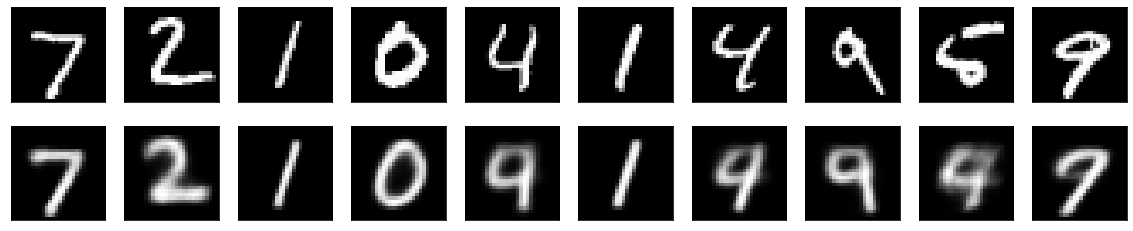

In [22]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

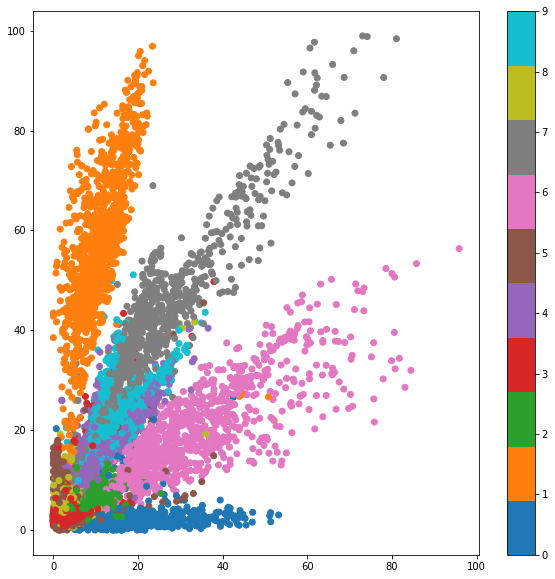

In [23]:
codes = encoder.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(codes[:,0],codes[:,1], c=y_test, cmap='tab10')
plt.colorbar()
plt.show()

In [24]:
from sklearn.manifold import TSNE

X_valid_compressed = encoder.predict(x_test)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


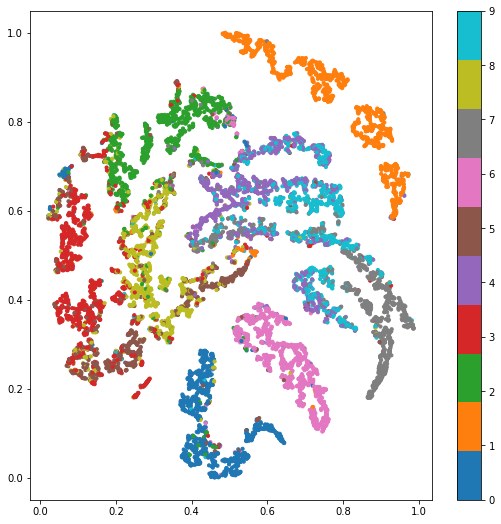

In [25]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_test, s=10, cmap="tab10")
#plt.axis("off")
plt.colorbar()
plt.show()